In [14]:
from __future__ import division
from re import compile, match


counters = {
    'semantic': {
        'successes': 0,
        'attempts': 0,
        'accuracies': {},
    },
    'syntactic': {
        'successes': 0,
        'attempts': 0,
        'accuracies': {},
    },
    'total': {
        'successes': 0,
        'attempts': 0,
        'accuracies': {},
    }
}
category_re = compile(r'^(?P<prefix>[^ ]{4})[^ ]*:$')
accuracy_re = compile(r'^ACCURACY TOP1:.*\((?P<successes>[0-9]*) / (?P<attempts>[0-9]*)\)$')
veclen_re = compile(r'^\[INFO\] Current vec len (?P<veclen>[0-9]*):$')

for log_pathname in '../accuracies7.log', '../accuracies8.log', '../accuracies6.log', '../accuracies9.log':
    with open(log_pathname, 'rt') as f:
        current_category_type = None
        current_veclen = None        
        for line in f.readlines():

            veclen_match = match(veclen_re, line)
            if veclen_match:
                if current_veclen is not None:
                    for category_type in 'semantic', 'syntactic', 'total':
                        successes = counters[category_type]['successes']
                        attempts = counters[category_type]['attempts']
                        if attempts > 0:
                            accuracy = successes / attempts * 100.0
                        else:
                            accuracy = 0.0
                        counters[category_type]['accuracies'][current_veclen] = accuracy
                        counters[category_type]['successes'] = 0
                        counters[category_type]['attempts'] = 0
                current_veclen = int(veclen_match.group('veclen'))

            category_match = match(category_re, line)
            if category_match:
                if category_match.group('prefix') == 'gram':
                    current_category_type = 'syntactic'
                else:
                    current_category_type = 'semantic'

            accuracy_match = match(accuracy_re, line)
            if accuracy_match:
                assert current_category_type is not None
                for category_type in current_category_type, 'total':
                    for counter_type in 'successes', 'attempts':
                        counters[category_type][counter_type] += int(accuracy_match.group(counter_type))

sem_accs = counters['semantic']['accuracies']
synt_accs = counters['syntactic']['accuracies']
total_accs = counters['total']['accuracies']

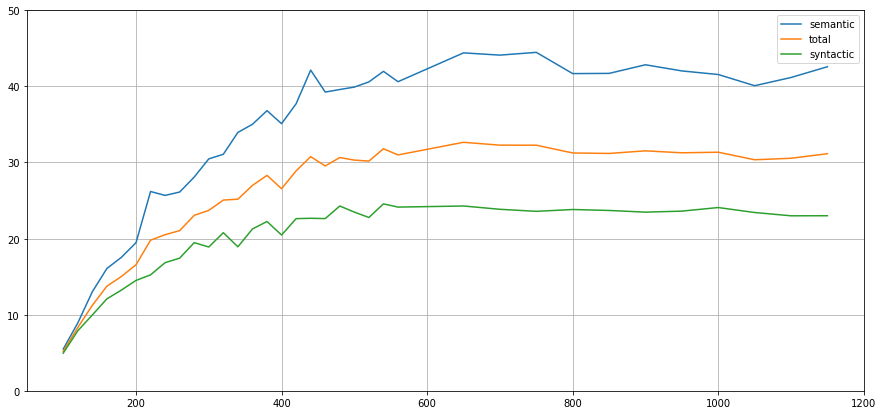

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

# detail of dimensions below 200
plt.figure(figsize=(15, 7))
plt.plot(*zip(*sorted(sem_accs.items())))
plt.plot(*zip(*sorted(total_accs.items())))
plt.plot(*zip(*sorted(synt_accs.items())))
plt.legend(['semantic', 'total', 'syntactic'])
plt.xlim(50, 1200)
plt.ylim(0, 50)
plt.grid(True)

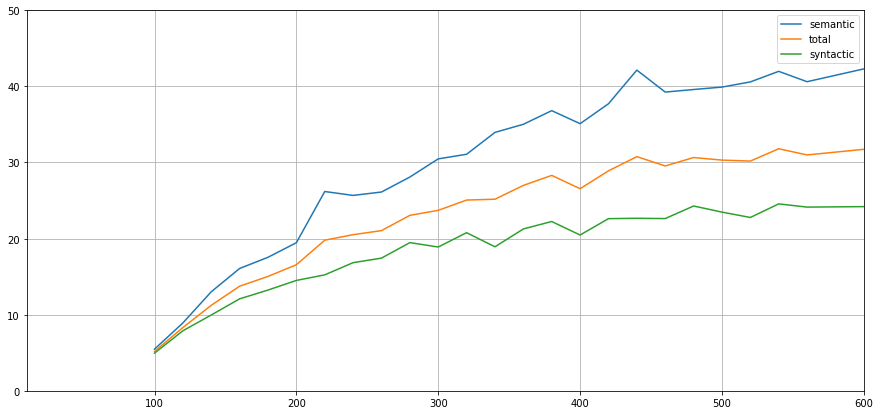

In [16]:
%matplotlib inline
plt.figure(figsize=(15, 7))
plt.plot(*zip(*sorted(sem_accs.items())))
plt.plot(*zip(*sorted(total_accs.items())))
plt.plot(*zip(*sorted(synt_accs.items())))
plt.legend(['semantic', 'total', 'syntactic'])
plt.xlim(10, 600)
plt.ylim(0, 50)
plt.grid(True)